# POST TEST 8 PRAKTIKUM KB

Nama: Muhammad Reyhan Setiawan

NIM: 2009106052

# The Android App Market on Google Play Deep Learning

# Import Library Package

Mengimpor library pandas sebagai pd, matplotlib.pyplot sebagai plt dan berbagai sklearn untuk data preprocesing dan tensorflow sebagai tf untuk deep learning. Dan data sebagai df untuk membaca dataset

In [1]:
import pandas as pd
import tensorflow as tf
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Membaca Dataset

Dataset berupa file .csv (appgooglefix.csv)

In [2]:
df = pd.read_csv("appgooglefix.csv")

In [3]:
df

,Rating,Reviews,Size,Type,Price
0,4.1,159,19.0,Free,0.0
1,3.9,967,14.0,Free,0.0
2,4.7,87510,8.7,Free,0.0
3,4.5,215644,25.0,Free,0.0
4,4.3,967,2.8,Free,0.0
...,...,...,...,...,...
9654,4.5,38,53.0,Free,0.0
9655,5.0,4,3.6,Free,0.0
9656,NaN,3,9.5,Free,0.0
9657,4.5,114,NaN,Free,0.0


# Data Preprocessing 

Sebelum lanjut ke deep learning, data akan dibersihkan terlebih dahulu kolom yang memiliki nilai Null

In [4]:
df.isna().sum()

Rating     1463
Reviews       0
Size       1227
Type          0
Price         0
dtype: int64

In [5]:
imputer_mean = SimpleImputer(strategy="mean")

In [6]:
df["Rating"] = imputer_mean.fit_transform(df[["Rating"]])
df["Size"] = imputer_mean.fit_transform(df[["Size"]])

In [7]:
df.isna().sum()

Rating     0
Reviews    0
Size       0
Type       0
Price      0
dtype: int64

Mengubah tipe data object menjadi angka pada kolom Type

In [8]:
df.replace("Free", value=0, inplace=True)
df.replace("Paid", value=1, inplace=True)

# Deep Learning

Menjadikan kolom Rating, Reviews, Size, Price sebagai label(y) dan kolom Type sebagai record(x)

In [74]:
X = df[['Rating', 'Reviews', 'Size', 'Price']]
Y = df[['Type']]

Membagi dataset menjadi training set dan testing set dengan proporsi 70:30

In [75]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, test_size=.3)

Encoding label dengan one-hot encoding menggunakan keras.utils

In [76]:
num_class = 2
y_train = tf.keras.utils.to_categorical(y_train, num_class)
y_test = tf.keras.utils.to_categorical(y_test, num_class)

Sequential model dengan fungsi activation ReLu dan softmax activation

In [77]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation="relu", input_dim=4),
    tf.keras.layers.Dense(num_class, activation="softmax")
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 2)                 10        
                                                                 
 dense_11 (Dense)            (None, 2)                 6         
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


Compile model menggunakan optimizer adam, categorical_crossentropy loss function, dan metrics accuracy

In [78]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=["accuracy"]
)

Training model dengan 30 epoch

In [79]:
history = model.fit(
    x = x_train, y = y_train, 
    validation_data=(x_test, y_test),
    verbose=2,
    epochs=30,
    steps_per_epoch=30
)

Epoch 1/30
30/30 - 1s - loss: 3.0893 - accuracy: 0.8034 - val_loss: 2.9732 - val_accuracy: 0.8009 - 1s/epoch - 44ms/step
Epoch 2/30
30/30 - 0s - loss: 2.8101 - accuracy: 0.8104 - val_loss: 2.6971 - val_accuracy: 0.8061 - 307ms/epoch - 10ms/step
Epoch 3/30
30/30 - 0s - loss: 2.5519 - accuracy: 0.8162 - val_loss: 2.4471 - val_accuracy: 0.8157 - 314ms/epoch - 10ms/step
Epoch 4/30
30/30 - 0s - loss: 2.3147 - accuracy: 0.8230 - val_loss: 2.2156 - val_accuracy: 0.8230 - 317ms/epoch - 11ms/step
Epoch 5/30
30/30 - 0s - loss: 2.0899 - accuracy: 0.8314 - val_loss: 1.9714 - val_accuracy: 0.8295 - 292ms/epoch - 10ms/step
Epoch 6/30
30/30 - 0s - loss: 1.8151 - accuracy: 0.8392 - val_loss: 1.6288 - val_accuracy: 0.8389 - 293ms/epoch - 10ms/step
Epoch 7/30
30/30 - 0s - loss: 1.4597 - accuracy: 0.8493 - val_loss: 1.2435 - val_accuracy: 0.8540 - 308ms/epoch - 10ms/step
Epoch 8/30
30/30 - 0s - loss: 1.0892 - accuracy: 0.8656 - val_loss: 0.8916 - val_accuracy: 0.8754 - 278ms/epoch - 9ms/step
Epoch 9/30
3

Evaluate model menggunakan data testing untuk melihat akurasi data

In [81]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Tes Loss:', score[0])
print('Tes Akurasi:', score[1])

Tes Loss: 0.31805890798568726
Tes Akurasi: 0.9296066164970398


Membuat visualisasi hasil akurasi dari data training dan data validasi

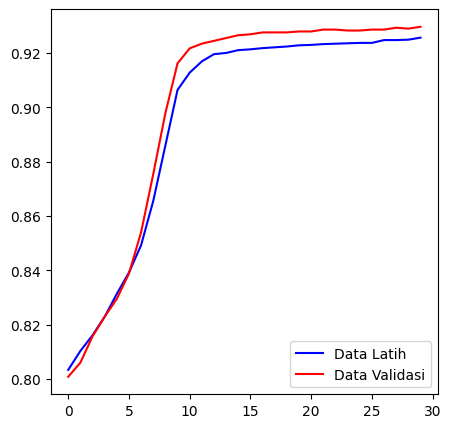

In [82]:
plt.figure(1, figsize=(5,5))
plt.plot(range(len(history.history['accuracy'])),
         history.history['accuracy'],
         color='b',
         label='Data Latih'
)
plt.plot(range(len(history.history['val_accuracy'])),
         history.history['val_accuracy'],
         color='r',
         label='Data Validasi',
         
)
plt.legend()
plt.show()